# EX 7

Implement program for decomposing time series data into trend and seasonality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load dataset
df = pd.read_csv("Sunspots.csv", parse_dates=['Date'], index_col='Date')

In [3]:
print(df.head())

            Unnamed: 0  Monthly Mean Total Sunspot Number
Date                                                     
1749-01-31           0                               96.7
1749-02-28           1                              104.3
1749-03-31           2                              116.7
1749-04-30           3                               92.8
1749-05-31           4                              141.7


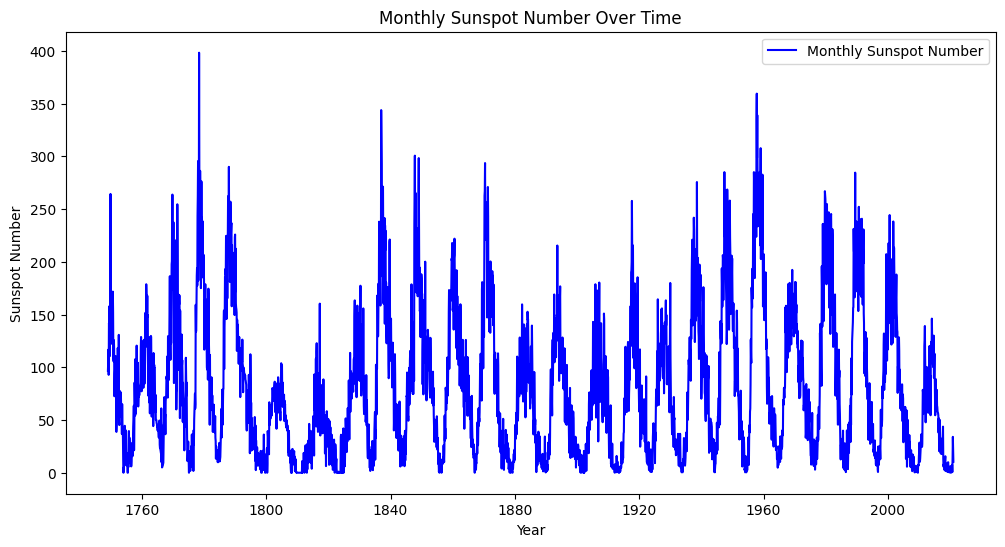

In [5]:
# Plot original time series
plt.figure(figsize=(12,6))
plt.plot(df['Monthly Mean Total Sunspot Number'], label="Monthly Sunspot Number", color='blue')
plt.title("Monthly Sunspot Number Over Time")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend()
plt.show()

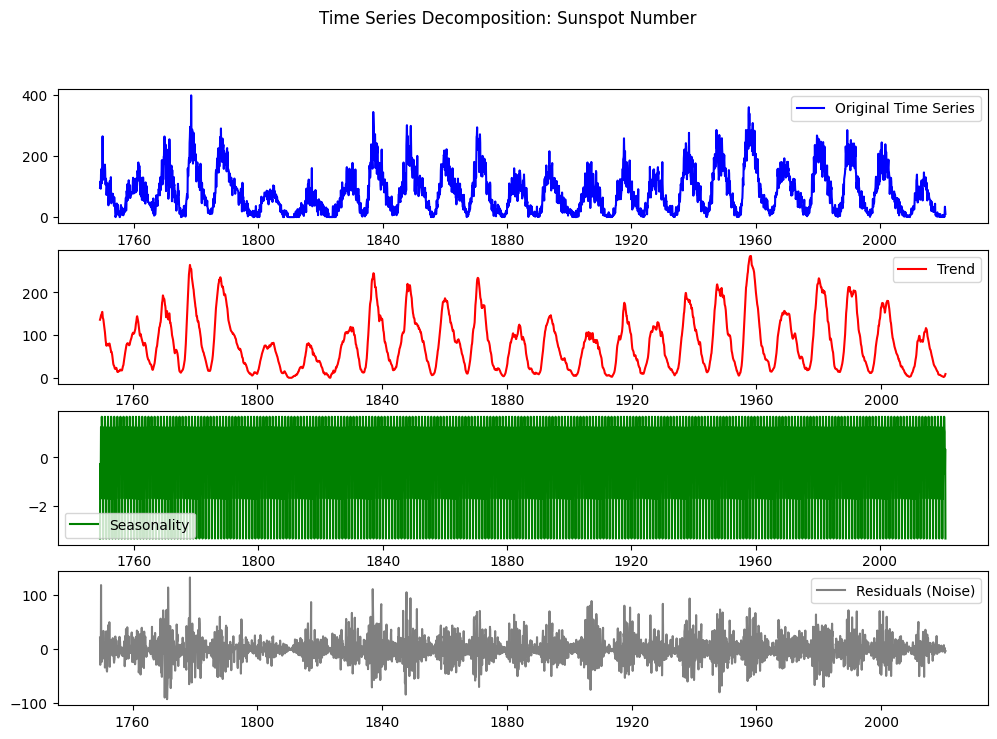

In [7]:
# Perform Seasonal Decomposition (Additive Model)
decomposition = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model='additive', period=12)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(df['Monthly Mean Total Sunspot Number'], label="Original Time Series", color='blue')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label="Trend", color='red')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonal, label="Seasonality", color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residual, label="Residuals (Noise)", color='gray')
plt.legend()

plt.suptitle("Time Series Decomposition: Sunspot Number")
plt.show()


In [9]:
# Calculate variance of trend, seasonality, and residuals
trend_var = np.var(trend.dropna())
seasonal_var = np.var(seasonal.dropna())
residual_var = np.var(residual.dropna())

# Calculate trend and seasonality strength
trend_strength = trend_var / (trend_var + residual_var)
seasonality_strength = seasonal_var / (seasonal_var + residual_var)

print(f"Trend Strength: {trend_strength:.2f}")
print(f"Seasonality Strength: {seasonality_strength:.2f}")


Trend Strength: 0.89
Seasonality Strength: 0.00
